#Multiouptut Regression analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cervical_cancer.csv')
df.drop('Unnamed: 0', axis = 1)

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
2,34,1.0,18.0,1.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
735,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
736,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,1,0
737,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


##Depenedent and independent variables

In [3]:
X = df.iloc[:,:-4]
y = df.iloc[:,-4:]

In [4]:
X.columns

Index(['Unnamed: 0', 'Age', 'Number of sexual partners',
       'First sexual intercourse', 'Num of pregnancies', 'Smokes',
       'Smokes (years)', 'Smokes (packs/year)', 'Hormonal Contraceptives',
       'Hormonal Contraceptives (years)', 'IUD', 'IUD (years)', 'STDs',
       'STDs (number)', 'STDs:condylomatosis', 'STDs:cervical condylomatosis',
       'STDs:vaginal condylomatosis', 'STDs:vulvo-perineal condylomatosis',
       'STDs:syphilis', 'STDs:pelvic inflammatory disease',
       'STDs:genital herpes', 'STDs:molluscum contagiosum', 'STDs:AIDS',
       'STDs:HIV', 'STDs:Hepatitis B', 'STDs:HPV', 'Dx:Cancer', 'Dx:CIN',
       'Dx:HPV', 'Dx'],
      dtype='object')

In [5]:
y.columns

Index(['Hinselmann', 'Schiller', 'Citology', 'Biopsy'], dtype='object')

In [6]:
X.shape, y.shape

((739, 30), (739, 4))

##Test-Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=4)

#Different multi-output regression models

##Linear Regression

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [10]:
# define model
lr_model = LinearRegression()
# fit model
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# make a prediction
lr_yhat = lr_model.predict(X_test)

In [12]:
n_scores = np.mean(cross_val_score(lr_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.127 (0.000)


##Lasso Regression

In [13]:
from sklearn.linear_model import Lasso

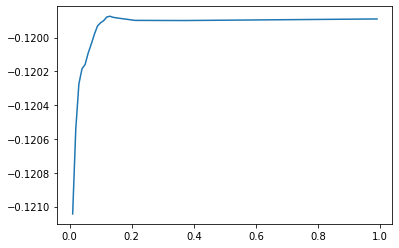

In [14]:
alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    l_model = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(l_model,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

In [15]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-0.119874


In [16]:
# define model
lasso_model = Lasso(alpha=.13)
#fit a model
lasso_model.fit(X_train,y_train)

Lasso(alpha=0.13, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [17]:
# make a prediction
lasso_yhat = lasso_model.predict(X_test)

In [18]:
n_scores = np.mean(cross_val_score(lasso_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.120 (0.000)


##K-nearest neighbours regression 

In [19]:
from sklearn.neighbors import KNeighborsRegressor

In [20]:
# define model
kn_model = KNeighborsRegressor()
# fit model
kn_model.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [21]:
# predict
kn_yhat = kn_model.predict(X_test)

In [22]:
n_scores = np.mean(cross_val_score(kn_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.115 (0.000)


##Decision Tree

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
# define model
dt_model = DecisionTreeRegressor()
# fit model
dt_model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [25]:
# predict
dt_yhat = dt_model.predict(X_test)

In [26]:
n_scores = np.mean(cross_val_score(dt_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.132 (0.000)


##Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor

In [28]:
# define model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=100,random_state=2)
# fit model
rf_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=100, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=2, verbose=0, warm_start=False)

In [29]:
# predict
rf_yhat = rf_model.predict(X_test)

In [30]:
n_scores = np.mean(cross_val_score(rf_model, X_train, y_train, scoring = 'neg_mean_absolute_error', cv= 3))
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.128 (0.000)


##Wrapper multioutput Regression

###Direct Multioutput Regression

In [31]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.svm import LinearSVR

In [32]:
# define base model
model = LinearSVR()
# define the direct multioutput wrapper model
wrapper = MultiOutputRegressor(model)
# fit the model on the whole dataset
wrapper.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


MultiOutputRegressor(estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                         fit_intercept=True,
                                         intercept_scaling=1.0,
                                         loss='epsilon_insensitive',
                                         max_iter=1000, random_state=None,
                                         tol=0.0001, verbose=0),
                     n_jobs=None)

In [33]:
dm_yhat = wrapper.predict(X_test)

In [34]:
# evaluate the model and collect the scores
n_scores = cross_val_score(wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.313 (0.146)


###Chained Multioutput Regression

In [35]:
from sklearn.multioutput import RegressorChain

In [36]:
# define base model
svr_model = LinearSVR()
# define the chained multioutput wrapper model
Wrapper = RegressorChain(svr_model)
# fit the model on the whole dataset
Wrapper.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


RegressorChain(base_estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0,
                                        fit_intercept=True,
                                        intercept_scaling=1.0,
                                        loss='epsilon_insensitive',
                                        max_iter=1000, random_state=None,
                                        tol=0.0001, verbose=0),
               cv=None, order=None, random_state=None)

In [37]:
cmr_yhat = Wrapper.predict(X_test)

In [38]:
# evaluate the model and collect the scores
n_scores = cross_val_score(Wrapper, X_train, y_train, scoring='neg_mean_absolute_error', cv=3, n_jobs=-1)
# force the scores to be positive
n_scores = np.absolute(n_scores)
# summarize performance
print('MAE: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

MAE: 0.211 (0.058)


##Model Evaluation

In [39]:
from sklearn.metrics import mean_absolute_error

print("Linear Regression: %.3f"  %(mean_absolute_error(y_test,lr_yhat)))
print("Lasso Regression: %.3f" %(mean_absolute_error(y_test,lasso_yhat)))
print("K nearest neighbour Regression: %.3f" %(mean_absolute_error(y_test,kn_yhat)))
print("Decision Trees Regression: %.3f" %(mean_absolute_error(y_test,dt_yhat)))
print("Random Forest Regression: %.3f" %(mean_absolute_error(y_test,rf_yhat)))
print("Direct Multioutput Regression: %.3f" %(mean_absolute_error(y_test,dm_yhat)))
print("Chained Multioutput Regression: %.3f" %(mean_absolute_error(y_test,cmr_yhat)))

Linear Regression: 0.138
Lasso Regression: 0.132
K nearest neighbour Regression: 0.118
Decision Trees Regression: 0.152
Random Forest Regression: 0.146
Direct Multioutput Regression: 0.166
Chained Multioutput Regression: 0.261


The best performing model is K-nearest neighbour regression so we will fit our data to this model.

###References

For more detailed explanation about the Multi-Output regression models you can check out the blog by [Machine Learning Mastery](https://machinelearningmastery.com/multi-output-regression-models-with-python/).